# Model Training

In [ ]:
%load_ext autoreload
%autoreload 2

import common
import pandas as pd
import scipy.sparse
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
import wandb
import os 

In [1]:
wandb.login()

NameError: name 'wandb' is not defined

## Parameters

In [ ]:
# change this accordingly
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

save_path = f"{project_path}/scicite_preprocessed"
dataset = "selected-features-glove"
project_name = "model-comparison-glove"

## 1. Load dataset

In [ ]:
train_df = pd.read_csv(f"{save_path}/train-{dataset}.csv")
test_df = pd.read_csv(f"{save_path}/test-{dataset}.csv")
label_encoder = joblib.load(f"{save_path}/label_encoder.pkl")

X_train = train_df.drop(columns=['label'])
y_train = train_df["label"]
X_test = test_df.drop(columns=['label'])
y_test = test_df["label"]

In [ ]:
X_train

,citeEnd,citeStart,string,excerpt_index,source_acronym,source_acronymParen,source_andPhrase,source_etAlPhrase,source_explicit,source_properNoun,isKeyCitation_False,isKeyCitation_True,sectionName_background,sectionName_conclusion,sectionName_method,sectionName_result,sectionName_unknown
0,175.0,168.0,[-2.33685747e-01 -1.12030692e-02 -2.50640005e-...,11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,36.0,16.0,[-2.66065359e-01 3.43722552e-02 -2.71874398e-...,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,228.0,225.0,[-0.27630368 0.02412027 -0.3027208 -0.085205...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,110.0,46.0,[-0.26411897 0.05334738 -0.28336918 -0.093257...,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,239.0,234.0,[-2.24826857e-01 2.06279829e-02 -2.60987401e-...,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,50.0,28.0,[-0.2645497 0.06414753 -0.29708758 -0.079226...,15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8237,182.0,179.0,[-0.26294777 0.0530495 -0.294986 -0.075998...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8238,120.0,108.0,[-2.41193354e-01 8.43109265e-02 -3.19331288e-...,8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8239,221.0,185.0,[-0.24734652 0.01362886 -0.21704574 -0.077155...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## 2. Train-validation split

In [ ]:
# Split into 80% train and 20% validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Train Logistic Regression 

In [ ]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

wandb.init(entity='cs4248-nlp-project',project=f"{project_name}-{dataset}", name="logistic-regression")
common.evaluate(y_test, y_pred, label_encoder, "Logistic Regression")
wandb.finish()

ValueError: could not convert string to float: '[-2.33685747e-01 -1.12030692e-02 -2.50640005e-01 -8.60984400e-02\n -5.68071961e-01  1.74480770e-02 -3.21529321e-02  1.77343667e-01\n -3.50841999e-01 -1.21994174e+00  1.19801825e-02  7.10177198e-02\n -3.42438251e-01  1.08895130e-01 -4.30280119e-02 -1.63381755e-01\n -2.96823561e-01  3.25122386e-01  1.63181752e-01 -7.26341241e-05\n -5.36697172e-02 -1.20650075e-01 -7.39684701e-02  3.81120518e-02\n -8.45510364e-02  1.32204935e-01  1.88230693e-01  1.72084913e-01\n  3.85195374e-01 -4.40050453e-01 -1.11614935e-01  3.70572388e-01\n -2.81259745e-01 -1.55525595e-01 -7.58229792e-01  1.04584116e-02\n  3.12804073e-01 -4.95054096e-01 -2.39743784e-01  1.57463789e-01\n -1.36665881e-01  9.02238954e-03 -5.86569726e-01  5.76141298e-01\n -2.36866772e-01 -2.85284579e-01  2.07071722e-01 -9.14326385e-02\n  5.86299077e-02  5.96483275e-02  8.62896815e-02  1.64373934e-01\n -8.50471929e-02  9.10999700e-02 -2.86507942e-02  3.44269246e-01\n  1.22545570e-01 -4.82959375e-02  3.40033397e-02 -3.52074236e-01\n  4.88606215e-01  1.89523578e-01  1.09405436e-01  1.58058569e-01\n -7.06802160e-02 -8.89356658e-02 -1.60715476e-01  1.17835991e-01\n  2.69629806e-01 -1.72549963e-01 -2.58159578e-01  3.93392593e-01\n  1.37800187e-01  2.78285503e-01 -3.91991884e-01 -1.14659704e-01\n  2.41119385e-01  5.46763614e-02 -1.06318057e-01  9.09941923e-03\n -8.95561278e-02  1.27661154e-01  2.21128881e-01 -4.67462689e-01\n  1.98007166e-01  4.18512560e-02 -1.16531827e-01  3.69835228e-01\n  8.19566399e-02 -1.06547512e-01  3.10692675e-02  1.28690898e-01\n -3.43037158e-01 -4.98905391e-01  3.30594331e-01  8.04348961e-02\n -1.37061357e-01 -2.52250433e-01  2.33929977e-01 -4.50404942e-01\n -1.91872969e-01 -2.03685891e-02 -4.54001538e-02  1.42333195e-01\n -1.66134059e-01 -3.01003456e-01  1.19484253e-01  3.15063596e-01\n  9.58411396e-02  9.10143331e-02 -4.96785901e-02 -9.95127782e-02\n  1.61675066e-01  5.09752221e-02 -8.14364552e-02 -4.01452929e-02\n -1.50318906e-01  2.09873259e-01  7.27069750e-02 -2.51265943e-01\n  3.71264666e-01 -2.17496663e-01  1.02599584e-01 -2.38112375e-01\n  8.69543627e-02  5.80584072e-02 -2.94480324e-02  6.05995916e-02\n -1.90904304e-01 -1.40548954e-02 -8.32281634e-02 -9.79936719e-02\n -3.87464702e-01  1.21392012e-01  7.36778378e-02 -2.28392676e-01\n -1.90927312e-02 -1.79633439e-01  2.60832638e-01 -1.02695987e-01\n -1.58908531e-01  3.31541598e-01  1.49677873e-01 -8.22535008e-02\n -3.09942484e-01 -1.05640076e-01 -2.64129281e-01 -2.14897349e-01\n  3.42200547e-01 -9.78154764e-02  3.27766687e-01 -2.31702626e-01\n  1.46565698e-02 -1.81723088e-01  1.75831139e-01 -5.18466160e-02\n  3.56863558e-01  7.41434991e-02  6.74853921e-02 -1.17731296e-01\n  1.62295662e-02 -1.19949080e-01 -2.36894235e-01 -2.27574930e-02\n -2.70631582e-01  2.85627574e-01 -3.31929848e-02  1.13908283e-01\n -1.35673776e-01  2.23258093e-01  1.00397058e-01  3.47184241e-01\n -1.61336392e-01  4.65854168e-01  1.17705259e-02 -4.48276885e-02\n -1.19320884e-01 -1.58248723e-01  1.72688901e-01  2.84347296e-01\n -2.71003574e-01  2.94415176e-01 -2.11226344e-01 -2.42927492e-01\n -3.11575681e-01 -3.30088466e-01 -2.42009342e-01  2.34625682e-01\n  2.71545708e-01  2.75806814e-01  4.33039635e-01  1.20872803e-01\n  1.33381069e-01  3.45147282e-01 -2.77377754e-01  7.13967979e-02\n  2.59188652e-01 -9.29953754e-02 -1.96661279e-01 -3.08943719e-01\n  8.93285155e-01 -8.39440674e-02  2.43540511e-01  3.99511099e-01\n  1.77705422e-01 -2.79069692e-01 -3.69730800e-01  2.15220973e-01\n  2.51295447e-01 -3.58549178e-01 -5.60040593e-01 -8.65412131e-02\n -2.06197903e-01  3.22072655e-01 -5.39519310e-01  3.77498493e-02\n  2.50269473e-01 -8.05768296e-02 -2.07175046e-01 -3.72787297e-01\n -5.93573414e-02  1.70891359e-01  1.28945261e-01  1.90153316e-01\n  6.64582923e-02 -6.63674250e-02  8.16312507e-02  8.25319737e-02\n -4.74748164e-02  2.66753346e-01 -3.77211496e-02  3.90896499e-01\n -3.19040008e-02 -2.89257586e-01  3.38071197e-01 -3.38391215e-03\n -1.11061707e-01 -3.26194130e-02  1.15770265e-01  1.94906592e-01\n -1.92465961e-01 -3.47631902e-01  2.21356601e-02  8.58273134e-02\n -1.12925626e-01  1.58423781e-02  1.35766447e-01 -1.50847182e-01\n -5.74192218e-02  1.59076571e-01 -1.67966723e-01  2.06980914e-01\n -1.91757992e-01 -2.53303379e-01 -1.58273339e-01 -1.47383660e-01\n  1.25666037e-01 -3.55373681e-01  9.62006673e-02  6.14778362e-02\n  4.64768291e-01 -3.71053666e-01 -1.24221452e-01 -8.44568610e-02\n -7.28110746e-02 -8.01755637e-02  4.25129265e-01  2.16216847e-01\n  1.76016897e-01  5.91660559e-01 -1.53390318e-01 -3.80417883e-01\n  2.86202639e-01 -3.89045447e-01 -2.04279214e-01  3.34190011e-01\n -8.39982450e-01 -3.46329808e-02 -8.16028565e-02  8.00041482e-03\n -2.50394940e-01 -2.88451105e-01 -4.84819651e-01 -2.27533981e-01\n  1.23742923e-01 -2.27535069e-02 -8.54667276e-02  1.29746526e-01\n  2.12268367e-01  1.92538515e-01 -1.49656445e-01 -1.85787883e-02\n -1.55606776e-01 -7.76076764e-02  1.04915507e-01  9.34521854e-02\n  5.08630991e-01 -5.71300864e-01 -1.53960958e-01  1.80032998e-01]'

## 4. Train Random Forest Classifier

Random Forest Classifier
-----Evaluation-----
Accuracy: 0.7912
Macro F1-score: 0.7155
Micro F1-score: 0.7912


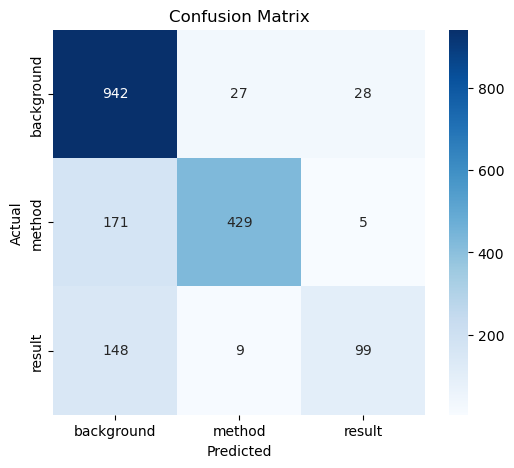

Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.79117
Macro F1-score,0.71552
Micro F1-score,0.79117


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

wandb.init(entity='cs4248-nlp-project',project=f"{project_name}-{dataset}", name="random-forest-classifier")
common.evaluate(y_test, y_pred_rf, label_encoder, "Random Forest Classifier")
wandb.finish()

## 5. Train Support Vector Machine (SVM)

Support Vector Machine (SVM)
-----Evaluation-----
Accuracy: 0.7804
Macro F1-score: 0.7496
Micro F1-score: 0.7804


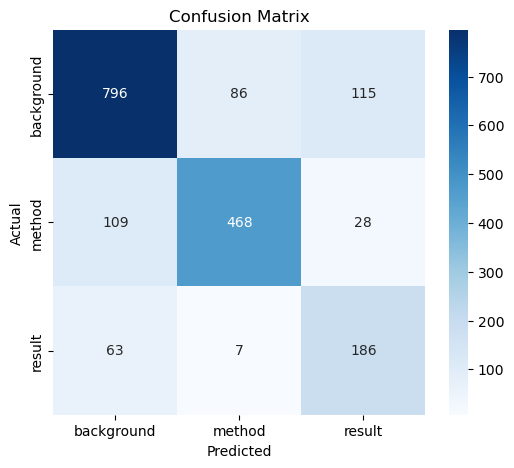

Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.78041
Macro F1-score,0.74961
Micro F1-score,0.78041


In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

wandb.init(entity='cs4248-nlp-project',project=f"{project_name}-{dataset}", name="support-vector-machine")
common.evaluate(y_test, y_pred_svm, label_encoder, "Support Vector Machine (SVM)")
wandb.finish()